# Image Processing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Blending
When stacking 2 or more images on top of one another. Pretty much a weighted sum of pixel values at each pixel + bias
* formula: new_pixel = $\alpha * pixel_1 + \beta * pixel_2 + ... + \gamma$

In [24]:
img1 = cv2.cvtColor(
    cv2.imread('data/dog_backpack.png'), 
    cv2.COLOR_BGR2RGB
)
img2 = cv2.cvtColor(
    cv2.imread('data/watermark_no_copy.png'), 
    cv2.COLOR_BGR2RGB
)

(1401, 934, 3)
(1280, 1277, 3)


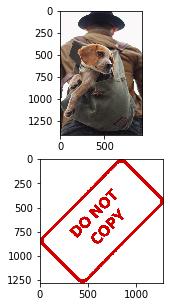

In [13]:
print(img1.shape)
print(img2.shape)
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(211)
ax1.imshow(img1)
ax1 = plt.subplot(212)
ax1.imshow(img2)

### Blending images of same size

In [14]:
# resizing to images of same size for blending
img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

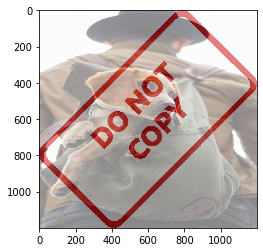

In [16]:
blended = cv2.addWeighted(
    src1=img1,
    alpha=0.5,
    src2=img2,
    beta=0.5,
    gamma=0
)
plt.imshow(blended)

### Blending images of different size
1. Overlay small image on top of large image, simply numpy array reassignment at overlapping elements
2. Blending only at image segments with overlaps, by masking background of small img

#### Overlaying small on large

In [25]:
img2 = cv2.resize(img2, (300, 300))
large_img = img1
small_img = img2

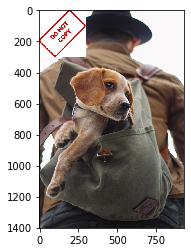

In [22]:
x_offset = 0
y_offset = 0
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]
large_img[y_offset:y_end, x_offset:x_end] = small_img
plt.imshow(large_img)

#### Blending small on large

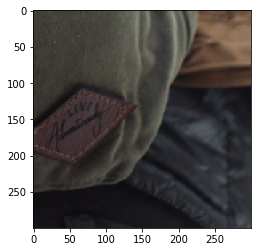

In [27]:
x_offset = large_img.shape[1] - small_img.shape[1]
y_offset = large_img.shape[0] - small_img.shape[0]
x_end = large_img.shape[1]
y_end = large_img.shape[0]
roi = large_img[y_offset:y_end, x_offset:x_end]
plt.imshow(roi)

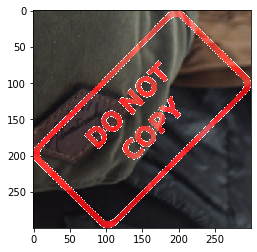

In [38]:
# Grab img2 w/o background
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
mask_inv = cv2.bitwise_not(img2_gray)

# Generate b/w mask across 3 channels, strategy:
# Generate 2x white img & mask em 
# (essentially an 'and' operation with mask) 
# white_bg = np.full(img2.shape, 255, dtype=np.uint8)
mask_rgb = cv2.bitwise_and(small_img, small_img, mask=mask_inv)
final_roi = cv2.bitwise_or(roi, mask_rgb)
plt.imshow(final_roi)

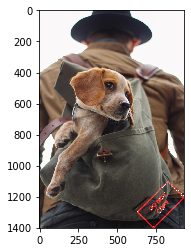

In [39]:
large_img[y_offset:y_end, x_offset:x_end] = final_roi
plt.imshow(large_img)

## Thresholding
Set pixel to obtain a binary value, either 0 (black) or 1 (white), when the original pixel value meets some condition (e.g. exceeds a threshold)

### Simple Thresholding

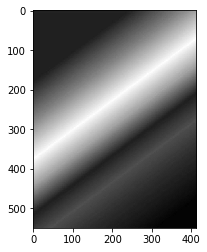

In [41]:
img = cv2.imread('data/rainbow.jpg', 0)
plt.imshow(img, cmap='gray')

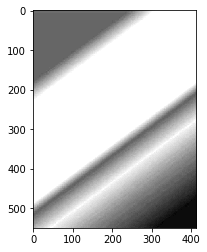

In [44]:
ret, thresh1 = cv2.threshold(
    img, 
    thresh=127, 
    maxval=255, 
    type=cv2.THRESH_TRUNC
)
plt.imshow(thresh1, cmap='gray')

### Adaptive Thresholding

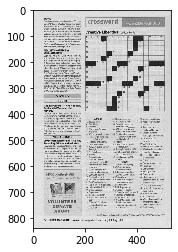

In [46]:
img = cv2.imread('data/crossword.jpg', 0)
plt.imshow(img, cmap='gray')

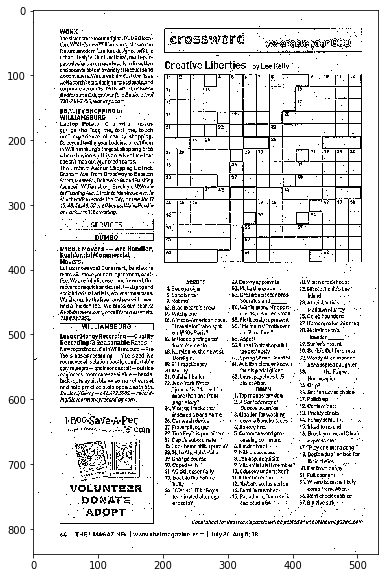

In [54]:
adapt_thresh = cv2.adaptiveThreshold(
    src=img, 
    maxValue=255, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY,
    blockSize=5,
    C=8
)
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
ax.imshow(adapt_thresh, cmap='gray')

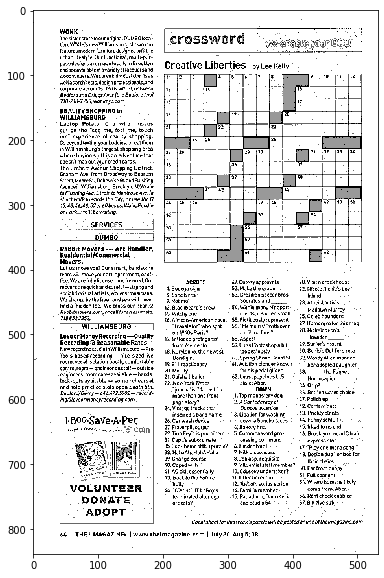

In [58]:
# can try blending with normal thresholding too
_, thresh = cv2.threshold(
    src=img,
    thresh=127,
    maxval=255,
    type=cv2.THRESH_BINARY
)
blended = cv2.addWeighted(
    src1=thresh,
    alpha=0.4,
    src2=adapt_thresh,
    beta=0.6,
    gamma=0
)
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
ax.imshow(blended, cmap='gray')

## Blurring & Smoothing

In [62]:
def reload_img():
    img = cv2.imread('data/bricks.jpg').astype(np.float32) / 255    # for normalization
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def display_img(img):
    fig = plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)
    ax.imshow(img)
    return

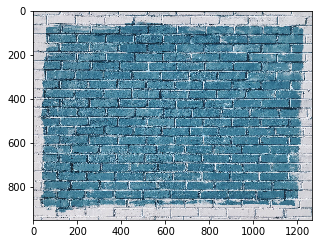

In [10]:
img = reload_img()
display_img(img=img)

### Gamma Correction

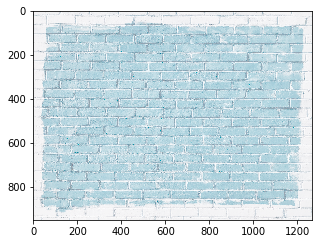

In [11]:
# Gamma correction (>1 = darken, <1 = brighten)
gamma = 1/4
display_img(np.power(img, gamma))

### Blurring

In [83]:
img = reload_img()
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, text='bricks', org=(10, 600), fontFace=font, fontScale=10, color=(255, 0, 0), thickness=4);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'BiFilter Blur')

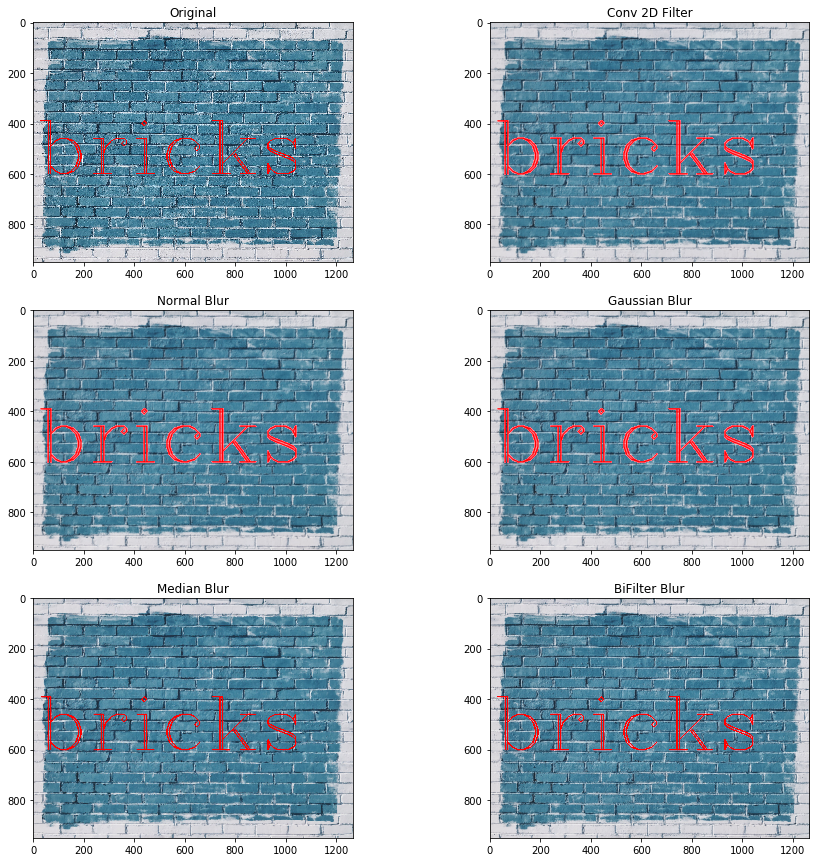

In [85]:
kdim = 5
ksize = (kdim, kdim)
n_kpix = kdim ** 2

# Blurring methods
## Conv filter2D
kernel = np.ones(ksize, dtype=np.float32) / n_kpix
img_conv = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

## Normal blur
img_blur = cv2.blur(src=img, ksize=ksize)

## Gaussian blur
img_gblur = cv2.GaussianBlur(src=img, ksize=ksize, sigmaX=10)

## Median blur
img_mblur = cv2.medianBlur(src=img, ksize=kdim)

## Bilateral filter
img_bifilter = cv2.bilateralFilter(src=img, d=kdim, sigmaColor=75, sigmaSpace=75)

fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(321)
ax.imshow(img)
ax.set_title('Original')
ax = plt.subplot(322)
ax.imshow(img_conv)
ax.set_title('Conv 2D Filter')
ax = plt.subplot(323)
ax.imshow(img_blur)
ax.set_title('Normal Blur')
ax = plt.subplot(324)
ax.imshow(img_gblur)
ax.set_title('Gaussian Blur')
ax = plt.subplot(325)
ax.imshow(img_mblur)
ax.set_title('Median Blur')
ax = plt.subplot(326)
ax.imshow(img_bifilter)
ax.set_title('BiFilter Blur')

In [77]:
# Generate noisy image
noise = np.random.normal(loc=100, scale=25, size=(950, 1267, 3)) / 100
img_noisy = np.multiply(img, noise, dtype=np.float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Conv 2D Filter')

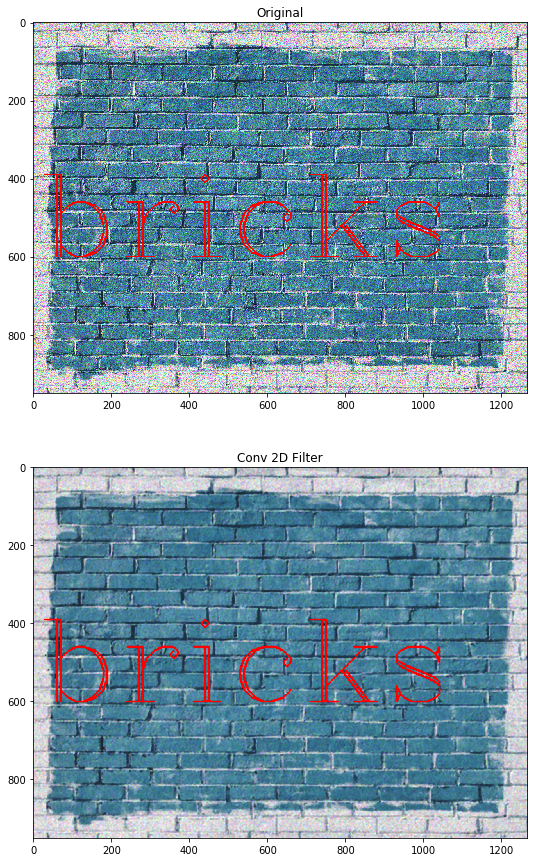

In [82]:
fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(211)
ax.imshow(img_noisy)
ax.set_title('Original')
ax = plt.subplot(212)
ax.imshow(cv2.medianBlur(img_noisy, ksize=kdim))
ax.set_title('Conv 2D Filter')

## Morphological Operators

In [88]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

def display_img(img):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    return

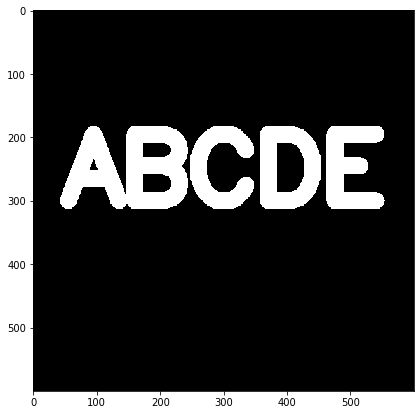

In [89]:
img = load_img()
display_img(img=img)

In [141]:
kdim = 5
ksize = (5, 5)
kernel = np.ones(shape=ksize, dtype=np.uint8)

# Erode & Dilate
img_erode = cv2.erode(src=img, kernel=kernel, iterations=4)
img_dilate = cv2.dilate(src=img, kernel=kernel, iterations=4)

# Gradient, takes difference between erosion and dilation
img_grad = cv2.morphologyEx(src=img, op=cv2.MORPH_GRADIENT, kernel=kernel)

# Opening --> Removing Noises via Erosion then Dilation
## White Noise
noise_w = np.random.randint(low=0, high=2, size=img.shape)
img_noisy_w = img + (noise_w * 255)
## Opening to rid white noise
img_opening = cv2.morphologyEx(src=img_noisy_w, op=cv2.MORPH_OPEN, kernel=kernel)

# Closing, dilation then erosion
## Black Noise
noise_b = np.random.randint(low=0, high=2, size=img.shape)
img_noisy_b = img + (noise_b * -255)
img_noisy_b[img_noisy_b == -255] = 0
## Closing to rid black noise
img_closing = cv2.morphologyEx(src=img_noisy_b, op=cv2.MORPH_CLOSE, kernel=kernel)

Text(0.5, 1.0, 'Closing')

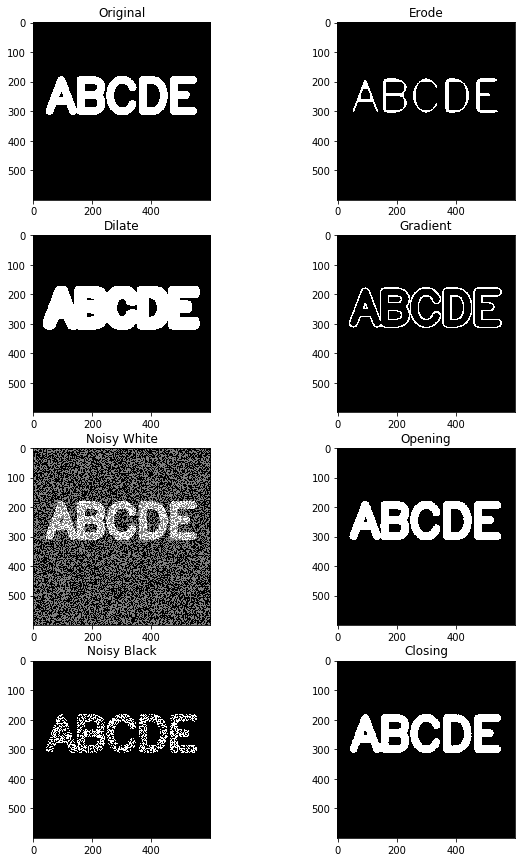

In [142]:
fig = plt.figure(figsize=(10, 15))
ax = plt.subplot(421)
ax.imshow(img, cmap='gray')
ax.set_title('Original')
ax = plt.subplot(422)
ax.imshow(img_erode, cmap='gray')
ax.set_title('Erode')
ax = plt.subplot(423)
ax.imshow(img_dilate, cmap='gray')
ax.set_title('Dilate')
ax = plt.subplot(424)
ax.imshow(img_grad, cmap='gray')
ax.set_title('Gradient')
ax = plt.subplot(425)
ax.imshow(img_noisy_w, cmap='gray')
ax.set_title('Noisy White')
ax = plt.subplot(426)
ax.imshow(img_opening, cmap='gray')
ax.set_title('Opening')
ax = plt.subplot(427)
ax.imshow(img_noisy_b, cmap='gray')
ax.set_title('Noisy Black')
ax = plt.subplot(428)
ax.imshow(img_closing, cmap='gray')
ax.set_title('Closing')